In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [2]:
dir = 'Assignment 1/Question 2/'
# Load stereo images
image_left = cv2.imread(dir+'bikeL.png', 0) # Load image in grayscale
image_right = cv2.imread(dir+'bikeR.png', 0) # Load image in grayscale

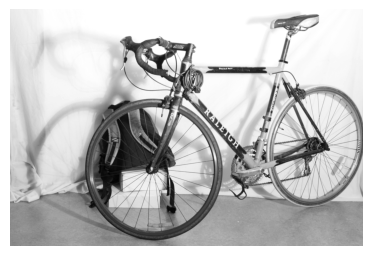

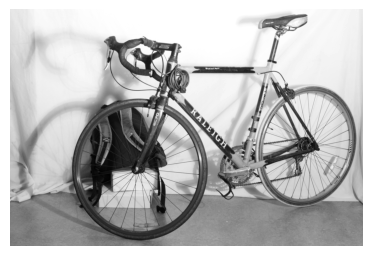

In [3]:
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.imshow(image_left, 'gray')
plt.axis('off')
plt.figure(figsize=(10,5))
plt.subplot(1,2,2)
plt.imshow(image_right, 'gray')
plt.axis('off')
plt.show()

In [4]:
# Load content of bike.txt
with open(dir+'bike.txt', 'r') as file:
    lines = file.readlines()

# Parse intrinsic matrices
K_left_str = lines[0].split("[")[1].split("]")[0]
K_right_str = lines[1].split("[")[1].split("]")[0]

K_left = np.array([[float(value) for value in K_left_str.split(';')[i].split()] for i in range(3)])
K_right = np.array([[float(value) for value in K_right_str.split(';')[i].split()] for i in range(3)])

# Print and verify the parsed intrinsic matrices
print("Intrinsic Matrix for Left Camera:")
print(K_left)
print("\nIntrinsic Matrix for Right Camera:")
print(K_right)

# Baseline
baseline = float(lines[2].replace('baseline=',''))
print("\nBaseline:", baseline)

Intrinsic Matrix for Left Camera:
[[5.299313e+03 0.000000e+00 1.263818e+03]
 [0.000000e+00 5.299313e+03 9.777630e+02]
 [0.000000e+00 0.000000e+00 1.000000e+00]]

Intrinsic Matrix for Right Camera:
[[5.299313e+03 0.000000e+00 1.438004e+03]
 [0.000000e+00 5.299313e+03 9.777630e+02]
 [0.000000e+00 0.000000e+00 1.000000e+00]]

Baseline: 177.288


In [5]:
def ShowDisparity(bsize=5):
    # Initialize the stereo block matching object 
    stereo = cv2.StereoBM_create(numDisparities=32, blockSize=bsize)
    
    # Compute the disparity image
    disparity = stereo.compute(image_left, image_right)
    
    # Normalize the image for reprsentation
    min = disparity.min()
    max = disparity.max()
    disparity = np.uint8(255* (disparity-min)/(max-min))
    
    return disparity

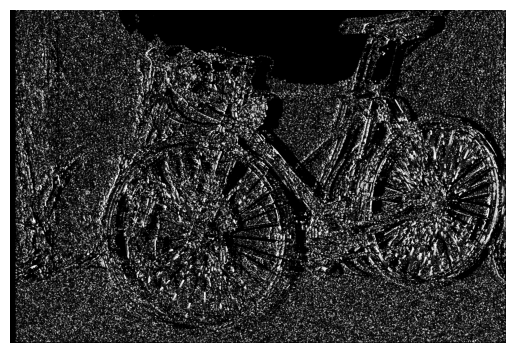

In [6]:
disparity_map = ShowDisparity(bsize=7)
plt.imshow(disparity_map, 'gray')
plt.axis('off')
plt.show()

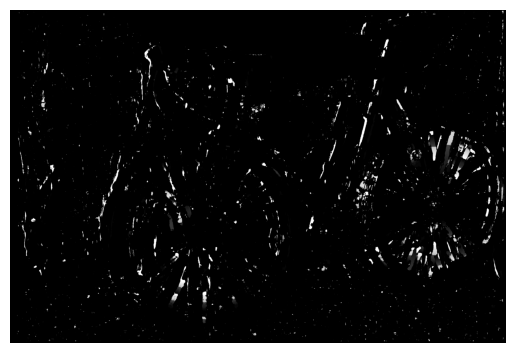

In [7]:
result = ShowDisparity(bsize=23)
plt.imshow(result, 'gray')
plt.axis('off')
plt.show()

In [8]:
def depth(disparity, baseline):
    focal_length = K_left[0, 0] # Assuming both cameras have the same focal length
    depth_map = np.zeros_like(disparity, dtype=np.float32)
    depth_map[disparity > 0] = (focal_length * baseline) / disparity[disparity > 0]

    return depth_map

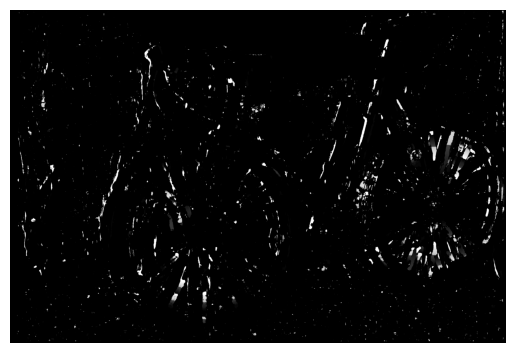

In [9]:
depth_map = depth(disparity_map, baseline)
plt.imshow(result, 'gray')
plt.axis('off')
plt.show()

In [11]:
# 3D point cloud generation
h, w = image_left.shape[:2]
focal_length = K_left[0, 0]
center_x, center_y = K_left[0, 2], K_left[1, 2]
y, x = np.indices((h, w))
X = (x - center_x) * depth_map / focal_length
Y = (y - center_y) * depth_map / focal_length
Z = depth_map

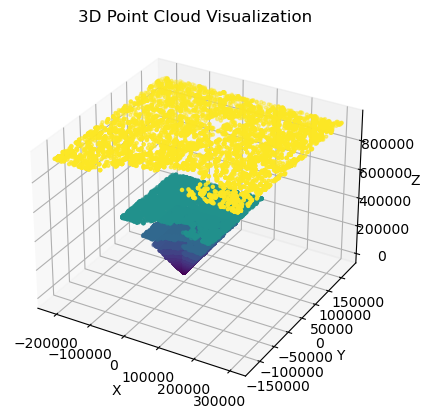

In [13]:
# Visualize the 3D point cloud
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Plot the 3D point cloud
ax.scatter(X.flatten(), Y.flatten(), Z.flatten(), c=Z.flatten(), cmap='viridis', marker='.')

# Set labels and title
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.set_title('3D Point Cloud Visualization')

# Show plot
plt.show()

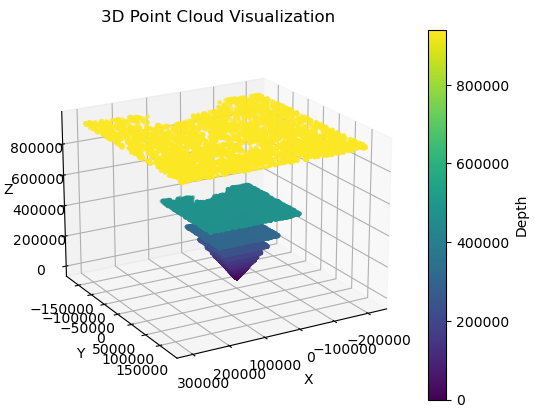

In [14]:
# Visualize the 3D point cloud
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Plot the 3D point cloud
scatter = ax.scatter(X.flatten(), Y.flatten(), Z.flatten(), c=Z.flatten(), cmap='viridis', marker='.')

# Set labels and title
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.set_title('3D Point Cloud Visualization')

# Add a colorbar
cbar = fig.colorbar(scatter, ax=ax, label='Depth')

# Allow interactive rotation
ax.view_init(elev=20, azim=60)

# Show plot
plt.show()

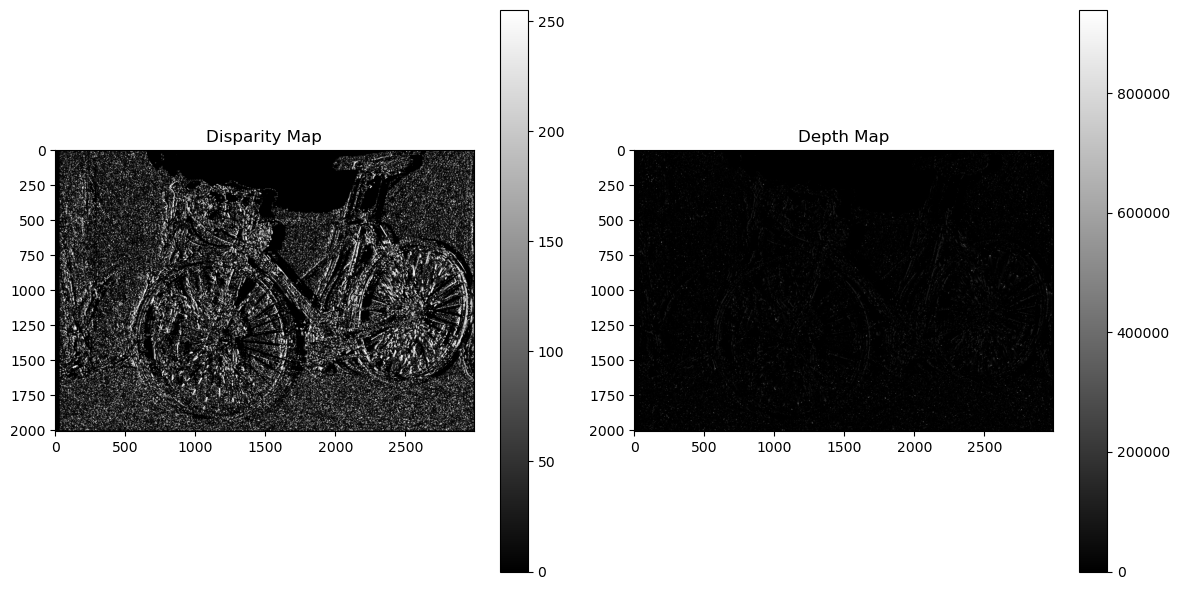

In [15]:
# Visualize disparity map and depth map
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.title('Disparity Map')
plt.imshow(disparity_map, cmap='gray')
plt.colorbar()

plt.subplot(1, 2, 2)
plt.title('Depth Map')
plt.imshow(depth_map, cmap='gray')
plt.colorbar()

plt.tight_layout()
plt.show()